# Assignment - Week 5

Note: I am using Google Colab because the local environment that I set up keeps crashing at random times.

**Instructions:**

The programming assignment for the Decision Tree model is:

1. Using the Scikit-Learn Library train the Decision Tree Classifier to the attached PhishingVsBenignURL data set using all of the features at once. (Dataset is originally from here: https://www.unb.ca/cic/datasets/url-2016.html )

2. Run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures for each tree depth. Compare the results of these 12 cases and discuss your results.

3. Take the best performing tree of depth 2 from above. Visualize the tree and discuss your observations. (For visualizing decision trees see: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)





In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz

In [8]:
# Upload the file

from google.colab import files

# This will open a file picker to upload from your computer
uploaded = files.upload()

# The uploaded file’s name should match your local file
df = pd.read_csv("DataSetForPhishingVSBenignUrl.csv")  # adjust if the filename is different


Saving M5_Decision Trees-1.ipynb to M5_Decision Trees-1.ipynb


In [9]:
# Analyzing data
print("Number of Samples:: ", df.shape[0])
print("Number of features: ", df.shape[1])
print(list(df.columns))

print(df['URL_Type_obf_Type'].value_counts())

Number of Samples::  36707
Number of features:  80
['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path', 'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength', 'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_Lon

In [11]:
X = df.drop("URL_Type_obf_Type", axis=1)

# convert the string categorical values into an integer code using factorize method of the pandas library.
y, label_names = pd.factorize(df["URL_Type_obf_Type"])

# check if any feature columns are categorical

non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", list(non_numeric))

Non-numeric columns: []


In [16]:
# check the data for missing of infinite values

print("Columns with missing values:")
print(X.columns[X.isna().any()].tolist())

print("Columns with infinity values:")
print(X.columns[np.isinf(X).any()].tolist())


Columns with missing values:
['avgpathtokenlen', 'NumberRate_DirectoryName', 'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath', 'Entropy_DirectoryName', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']
Columns with infinity values:
['argPathRatio']


In [17]:
# since we have missing and infinite values in the data, we will replace them with median

X = X.replace([np.inf, -np.inf], np.nan)

# replace NaN with column median
X = X.fillna(X.median())

In [18]:
# split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

Criterion=gini     | Depth=1  | Accuracy=0.3728
Criterion=gini     | Depth=2  | Accuracy=0.4874
Criterion=gini     | Depth=3  | Accuracy=0.6229
Criterion=gini     | Depth=4  | Accuracy=0.6871
Criterion=gini     | Depth=5  | Accuracy=0.7291
Criterion=gini     | Depth=6  | Accuracy=0.7767
Criterion=entropy  | Depth=1  | Accuracy=0.3739
Criterion=entropy  | Depth=2  | Accuracy=0.5267
Criterion=entropy  | Depth=3  | Accuracy=0.6230
Criterion=entropy  | Depth=4  | Accuracy=0.6913
Criterion=entropy  | Depth=5  | Accuracy=0.7317
Criterion=entropy  | Depth=6  | Accuracy=0.7831

Summary of results:
    Criterion  Depth  Accuracy
0       gini      1  0.372832
1       gini      2  0.487424
2       gini      3  0.622900
3       gini      4  0.687097
4       gini      5  0.729138
5       gini      6  0.776718
6    entropy      1  0.373922
7    entropy      2  0.526741
8    entropy      3  0.622991
9    entropy      4  0.691274
10   entropy      5  0.731681
11   entropy      6  0.783075


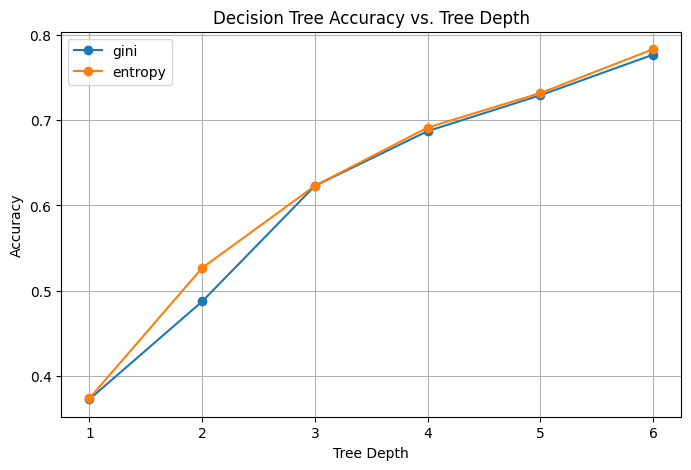

In [19]:
# save the results
results = []

# Loop over both impurity measures and depths
for criterion in ['gini', 'entropy']:
    for depth in range(1, 7):
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((criterion, depth, acc))
        print(f"Criterion={criterion:<8} | Depth={depth:<2} | Accuracy={acc:.4f}")

# Convert to DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['Criterion', 'Depth', 'Accuracy'])
print("\nSummary of results:\n", results_df)

# Plot accuracy vs depth
plt.figure(figsize=(8, 5))
for criterion in ['gini', 'entropy']:
    subset = results_df[results_df['Criterion'] == criterion]
    plt.plot(subset['Depth'], subset['Accuracy'], marker='o', label=criterion)
plt.title('Decision Tree Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of results

Both impurity criterions start with very low accuracy at tree depth of 1. That is when only one split os performed and data can be separated only in two classes rather than the 5 we have. As tree depth increases, initially entropy has better accuracy than gini but as the tree depth grows they are about the same and the acuracy gains of adding more tree depth start to decrease. Overall, the achieved accuracy of 0.78 is decent given the fact that we have 5 classes and a random guess would give only 0.2 accuracy.

# Part 2 - Visualize the Tree

I will select the entropy criterion as it clearly had better performance at tree depth 2

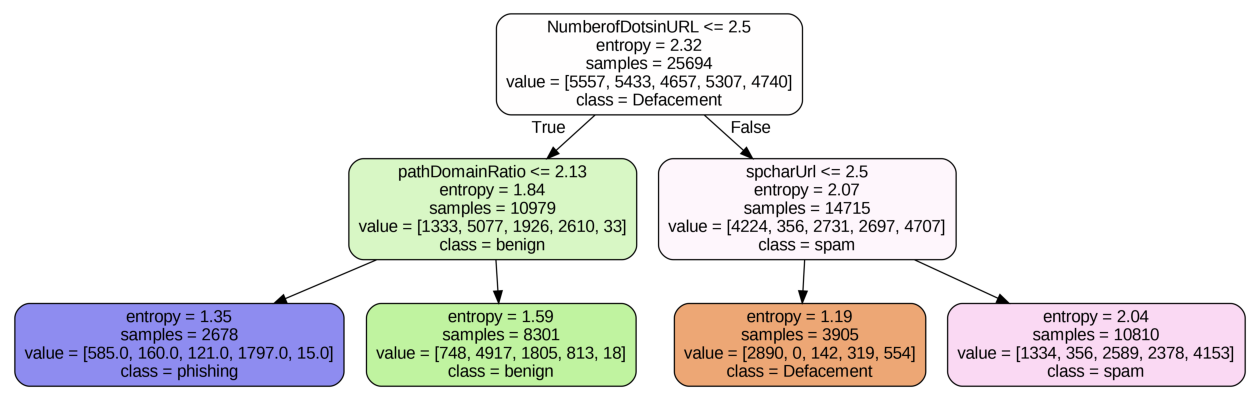

In [20]:
from sklearn.tree import export_graphviz
from subprocess import call

# Train the best-performing model (depth=2, entropy)
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
best_clf.fit(X_train, y_train)

# Export the tree as a DOT file
export_graphviz(
    best_clf,
    out_file='tree.dot',
    feature_names=X.columns,
    class_names=label_names,  # from pd.factorize earlier
    rounded=True,
    proportion=False,
    precision=2,
    filled=True
)

# Convert DOT to PNG using Graphviz
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

# Display the tree image
plt.figure(figsize=(16, 10))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()


# Observations of Tree Plot

At the root node level, all data samples are classified as Defacement, as that is the most frequent value in the dataset. The first split is on 'NumberofDotsinURL' - that is the feature that will reduce the entropy the most when used to divide the data. The initial entropy of having all 5 classes together is 2.32.  If a node has less than 3 dots in URL, we go to the left branch, else we go to the right. The next feature on the left branch is pathDomainRatio, i.e. the length of the path portion of the URL vs the domain portion. If less than two, this is classified as phishing. The benign URLs will have path/domain length ratio greater than 2.13. Following the right branch from the root, the next split is on spcharUrl - special characters in URL, where if the special characters are more then 2, it is most likely spam and if 2 or less - most likely Defacement. Overall, this model achieved accuracy of 0.53 and is missing the malware class.